# 🍀Подключение необходимых библиотек для работ с данными

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.simplefilter('ignore')

# 🍀Загружаем данные и проверяем что имеем

In [22]:
df = pd.read_csv("main.csv").drop_duplicates()
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,ID 120271947,homeowner,https://elektrougli.cian.ru/sale/flat/305815701/,Электроугли,sale,flat,7.0,9.0,2.0,47.8,...,-1.0,-1,"28,2 м²",8 м²,79623650661,NaN,Школьная,40,Железнодорожная,NaN
1,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/299601370/,Электроугли,sale,flat,7.0,14.0,1.0,41.0,...,-1.0,-1,18 м²,9 м²,79623638905,NaN,Школьная,38,Железнодорожная,NaN
2,ID 115031885,homeowner,https://elektrougli.cian.ru/sale/flat/307496224/,Электроугли,sale,flat,2.0,5.0,1.0,25.0,...,-1.0,-1,12 м²,5 м²,79660478973,NaN,Советская,11,Железнодорожная,NaN
3,ID 15867135,real_estate_agent,https://elektrougli.cian.ru/sale/flat/307048067/,Электроугли,sale,flat,5.0,5.0,1.0,33.3,...,-1.0,-1,18 м²,8 м²,79104572936,NaN,Пионерская,6Б,Железнодорожная,NaN
4,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/308257607/,Электроугли,sale,flat,1.0,3.0,2.0,45.8,...,-1.0,-1,"26,7 м²",7 м²,79623638905,NaN,переулок 2-й Троицкий,3,Железнодорожная,NaN


In [23]:
# проверяем размер файла
df.shape

(20071, 24)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                19591 non-null  object 
 1   author_type           19595 non-null  object 
 2   url                   20067 non-null  object 
 3   location              19663 non-null  object 
 4   deal_type             20070 non-null  object 
 5   accommodation_type    20070 non-null  object 
 6   floor                 20070 non-null  float64
 7   floors_count          20070 non-null  float64
 8   rooms_count           20070 non-null  float64
 9   total_meters          20070 non-null  object 
 10  price                 19992 non-null  float64
 11  year_of_construction  20070 non-null  object 
 12  object_type           20067 non-null  float64
 13  house_material_type   20067 non-null  object 
 14  heating_type          20067 non-null  float64
 15  finish_type        

# 🍀Анализ и чистка данных
Для начала заменим все пропуски данных, которые имеют значение -1 на NaN, для дальнейшей удобной работы с этими данными.<br>
Также заменим floor, floors_count, rooms_count с значения float на int, т.к. этаж, количество этажей в доме и количество комнат не могу быть с плавующей запятой.<br>
В location, rooms_count, price можно заметить что нехватает данных, так что удалим строк в которых нет данных.<br>
За одно сразу удалим лишние столбцы, которые никак не будут влиять на цену квартиры и м2

In [25]:
df = df.replace(-1,np.nan)
df = df.replace("-1",np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace("-1.0",np.nan)
df = df.dropna(subset=['location', 'price', 'rooms_count'])
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)
df.drop(['phone', 'deal_type', 'accommodation_type', 'object_type', 'heating_type'], axis=1, inplace=True)
print(f'Количество столбцов после чистки {df.shape[1]} столбцы')
# Необходимо в сохранённом файле изменить ��� на 0, для избежания ошибок

Количество столбцов после чистки 19 столбцы


Проверим количество пропущенных значений в столбцах

In [26]:
df.isnull().sum()

author                    454
author_type               447
url                         0
location                    0
floor                       0
floors_count                0
rooms_count                 0
total_meters                0
price                       0
year_of_construction     4049
house_material_type     16909
finish_type             16059
living_meters            4373
kitchen_meters           2615
district                 9498
street                   2919
house_number             2038
underground              5901
residential_complex     10237
dtype: int64

# 🍀Проверка пропусков данных в %

In [27]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 2%
author_type - 2%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
house_material_type - 87%
finish_type - 83%
living_meters - 22%
kitchen_meters - 13%
district - 49%
street - 15%
house_number - 10%
underground - 30%
residential_complex - 53%


# 🍀Удаляём ещё несколько не нужных столбцов, которые не будут влиять на цену квартир


In [28]:
df.drop(['house_material_type', 'finish_type', 'author', 'url'], axis=1, inplace=True)

In [29]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 2%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
living_meters - 22%
kitchen_meters - 13%
district - 49%
street - 15%
house_number - 10%
underground - 30%
residential_complex - 53%


# 🍀Нам сложно будет найти данные о ЖК (residential_complex), и номере дома (house_number)  
Также изменим все не достующие данные в underground и street на NaN и избавлюсь от строк с названием типа автора, года постройки

In [30]:
df.drop(['residential_complex', 'house_number'], axis=1, inplace=True)
df = df.dropna(subset=['underground', 'street', 'author_type', 'year_of_construction'])

In [31]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 22%
kitchen_meters - 11%
district - 60%
street - 0%
underground - 0%


# 🍀Сейчас нам необходимо разобраться с пропусками в living_meters и kitchen_meters  
Эти данные буду сильно влиять на образование цены квартиры или м2

In [32]:
# перед этим избавиться от символа м²
df["kitchen_meters"] = (df["kitchen_meters"].str.replace("\xa0м²", "").str.replace(",", ".").astype(float))
df['living_meters'] = df['living_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)

In [33]:
df['living_meters'] = df['living_meters'].fillna(df['living_meters'].median()) 
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['kitchen_meters'].median())

In [34]:
# сразу проверим значения после подставки моды
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 60%
street - 0%
underground - 0%


# 🍀Создадим функцию для для замены отсутствия данных в столбце district

In [35]:
df['temp_district'] = df['district']
msk_condition = (df['location'] == 'Москва') & df['district'].isna()
df.loc[msk_condition & df['underground'].notna(), 'temp_district'] = df['underground']
df.loc[msk_condition & df['underground'].isna(), 'temp_district'] = 'Москва'
other_condition = df['district'].isna() & (df['location'] != 'Москва')
df.loc[other_condition, 'temp_district'] = df['location']
df['district'] = df['temp_district']
df.drop(columns=['temp_district'], inplace=True)
# Здесь сначала мы создаём временной столбец для хранения новых данных, после чего заполняем значения для Москвы, а других локаций, копируем данные из временного столбца в столбец 'distirct' нашего файла. 

In [36]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 0%
street - 0%
underground - 0%


<Axes: >

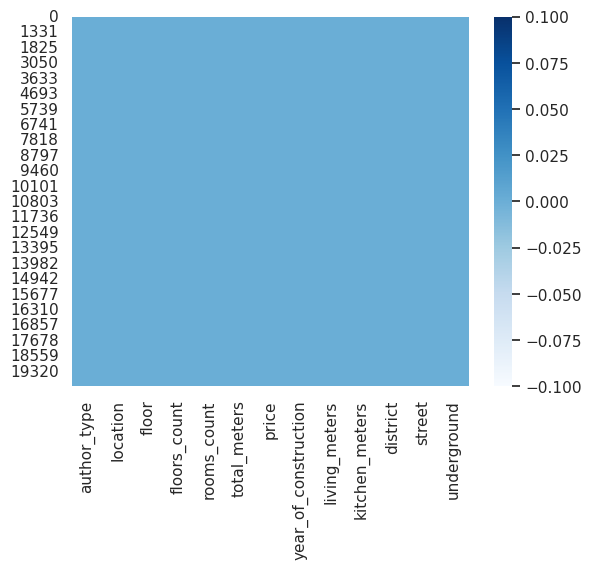

In [37]:
# проверим пропуски после чистки
sns.heatmap(df.isnull(), cmap='Blues', )

# 🍀Функция для кодирования данных и проверки их на зависимости

In [38]:
from sklearn import preprocessing
#функция, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем
df.shape

(9469, 13)

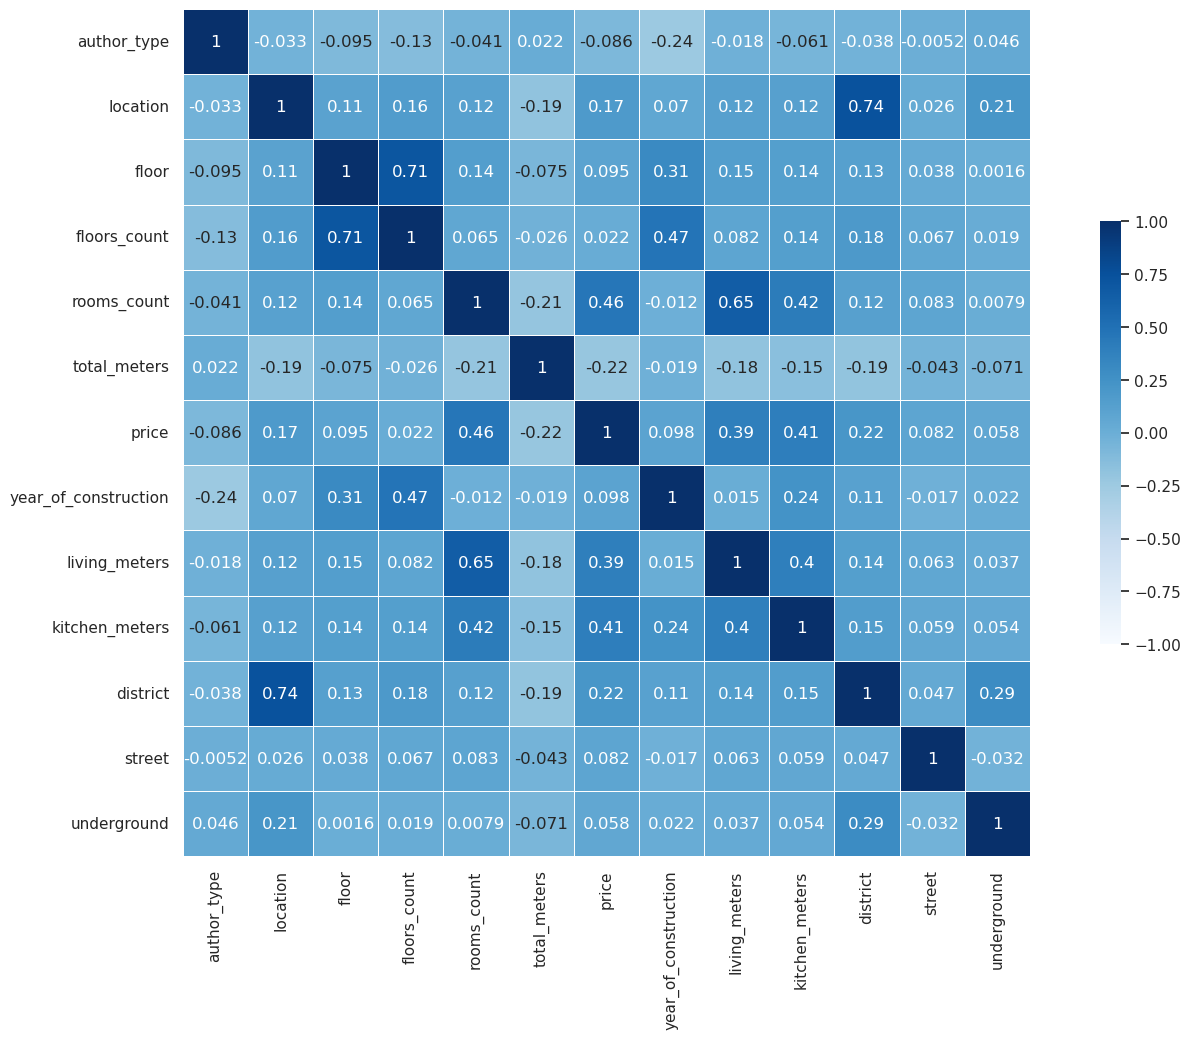

In [39]:
sns.set(style="darkgrid")

# Копируем данные и считаем корреляцию
temp3 = encoded_data.copy()
corr = temp3.corr()

# Задаем размер фигуры
f, ax = plt.subplots(figsize=(18, 11))

# Задаем цветовую палитру в желто-оранжевых оттенках
cmap = sns.color_palette("Blues", as_cmap=True)

# Создаем тепловую карту без маски
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Показываем график
plt.show()

# 🍀Сделаем функцию для расчёт средней цены м²

In [75]:
dict_city = df['location'].unique()

def price_for_meter(location):
    city = df[df['location'] == location]
    price_for_city = city['price'].sum()
    
    clean_data = city['total_meters'].sum()
    
    return round(price_for_city/clean_data, 2)

with open('sorted_info.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    names = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=names)
    writer.writeheader()
    for city in dict_city:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [66]:
info = pd.read_csv('sorted_info.csv')
info_sorted = info.sort_values(by='price_for_meter', ascending=False)

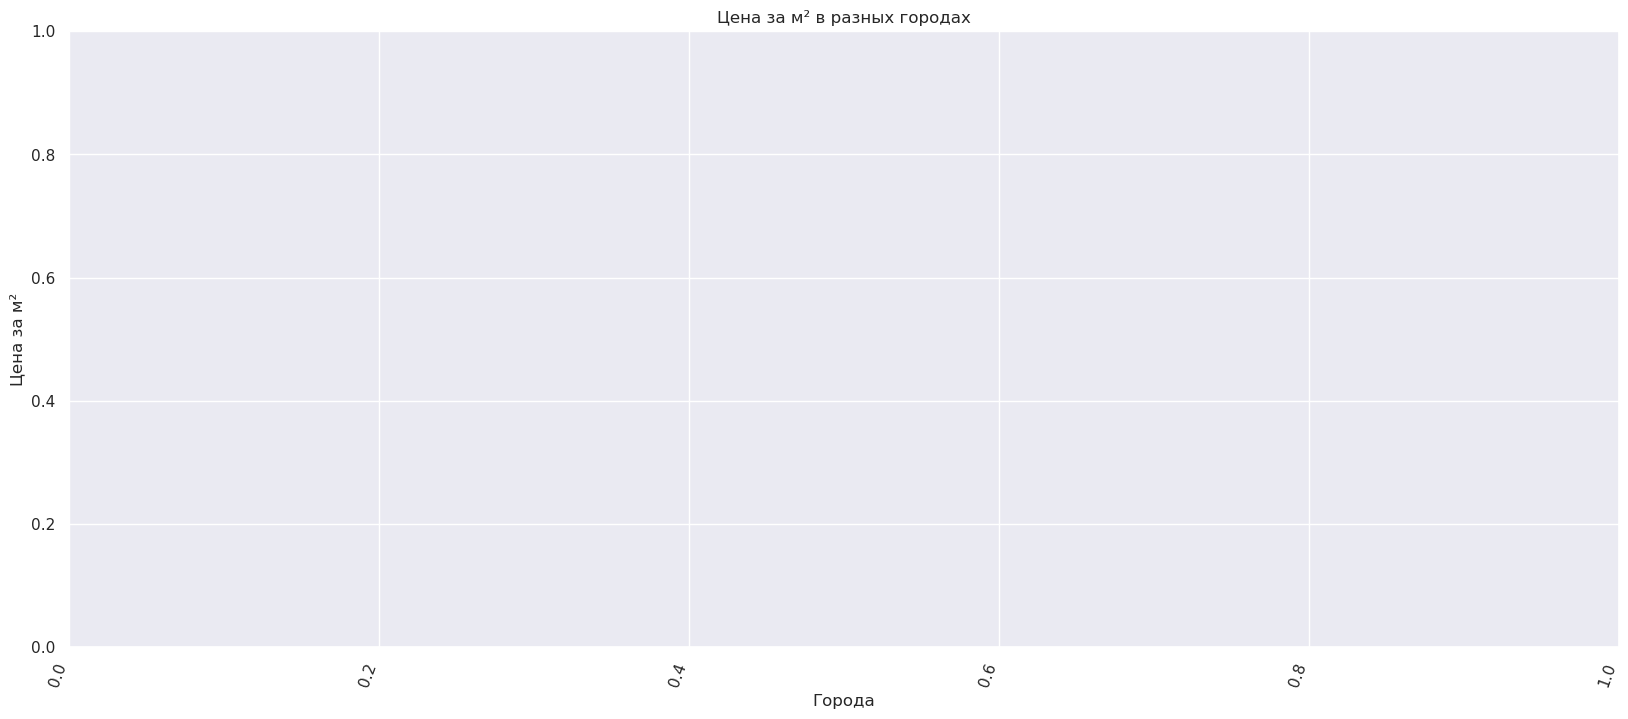

In [76]:
# График для средней цены за м2 во всех городах
sns.set_style("darkgrid")
info = pd.read_csv('sorted_info.csv')
plt.figure(figsize=(20, 8))
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=info, color='m')
plt.title('Цена за м² в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена за м²')
plt.xticks(rotation=70, ha='right')
plt.show()

<Figure size 640x480 with 0 Axes>

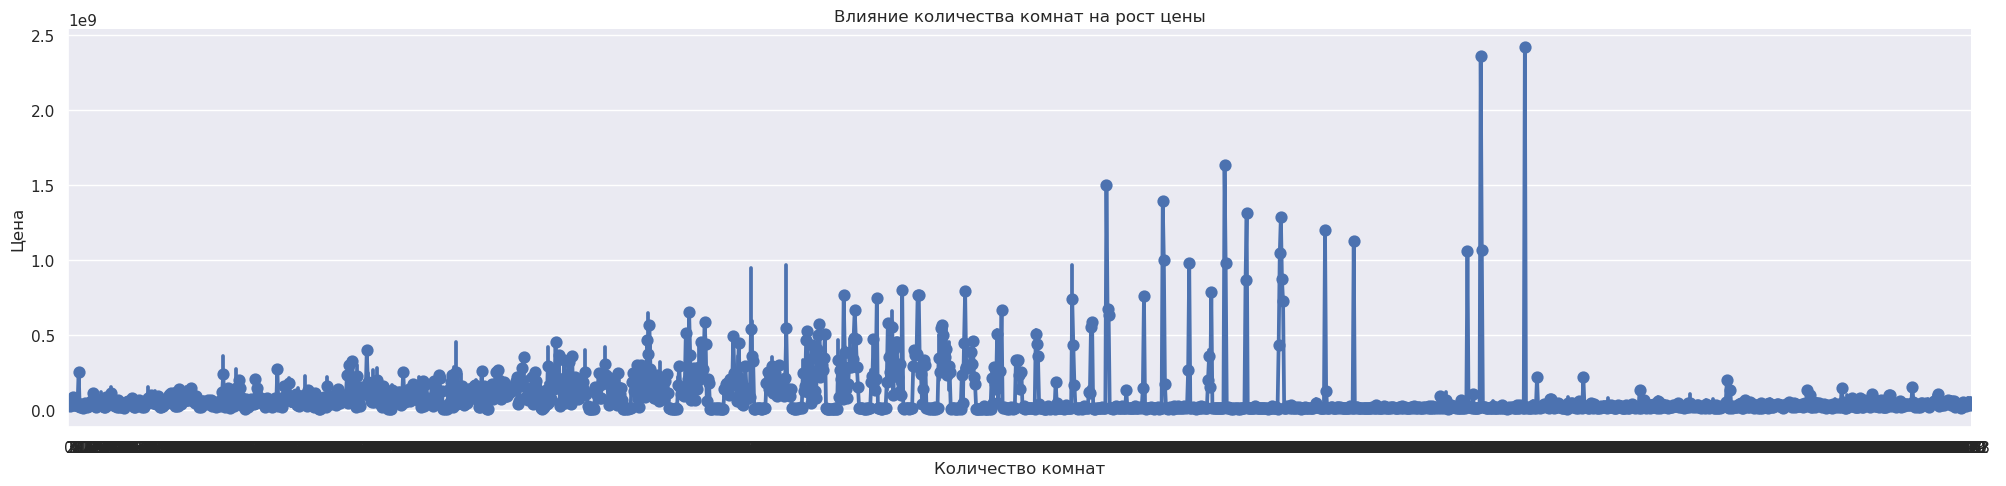

In [77]:
plt.figure()
sns.catplot(x='total_meters', y='price', data=encoded_data, kind='point', aspect=4, color='b')
plt.title("Влияние количества комнат на рост цены")
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.show()

🍀После вывода графиков, мы можем понять, что самая большая цена за м² в Москве.  
🍀Смотря по тепловой карте, можно увидеть что самым главным фактором который влияет на цену квартир является площадь квартиры  
🍀Также не мало важным фактором ценообразования квартиры является количество комнат